In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_csv('data_simulasi_dasist_IBM_v2.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,1,Medium,Female,...,2,Sales Executive,Very High,Single,5993,Excellent,Low,8,Bad,0
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,2,High,Male,...,2,Research Scientist,Medium,Married,5130,Outstanding,Very High,10,Better,1
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Very High,Male,...,1,Laboratory Technician,High,Single,2090,Excellent,Medium,7,Better,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,5,Very High,Female,...,1,Research Scientist,High,Married,2909,Excellent,High,8,Better,3
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,7,Low,Male,...,1,Laboratory Technician,Medium,Married,3468,Excellent,Very High,6,Better,2


In [4]:
df.to_excel('data_simulasi_IBM_tableau.xlsx', index=False)

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'group_monthly_income'],
      dtype='object')

In [14]:
df['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [15]:
df['person'] = 1

In [33]:
df['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [34]:
def education_int(value):
    if value == 'Below College':
        return 1
    elif value == 'College':
        return 2
    elif value == 'Bachelor':
        return 3
    elif value == 'Master':
        return 4
    elif value == 'Doctor':
        return 5

In [35]:
df['education_int'] = df['Education'].apply(lambda x : education_int(x))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
df_fi = df[['education_int', 'MonthlyIncome', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'Attrition']]

In [37]:
X=df_fi[['education_int', 'MonthlyIncome', 'TotalWorkingYears', 'YearsSinceLastPromotion']]  # Features
y=df_fi['Attrition'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
clf.feature_importances_

array([0.10825959, 0.56728856, 0.21877034, 0.10568151])

In [27]:
df_fi.head()

,Education,MonthlyIncome,TotalWorkingYears,YearsSinceLastPromotion,Attrition
0,College,5993,8,0,Yes
1,Below College,5130,10,1,No
2,College,2090,7,0,Yes
3,Master,2909,8,3,No
4,Below College,3468,6,2,No


In [21]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='person'>

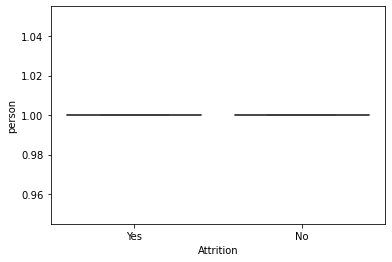

In [20]:
sns.boxplot(data=df, x='Attrition', y='person')

In [6]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [7]:
def group_monthly_income(value):
    if value <= 2911:
        return 1
    elif value > 2911 and value <= 4919:
        return 2
    elif value > 4919 and value <= 8379:
        return 3
    else:
        return 4

In [8]:
df['group_monthly_income']  = df['MonthlyIncome'].apply(lambda x: group_monthly_income(x))

In [12]:
pd.crosstab(df['group_monthly_income'], df['Attrition']).T

group_monthly_income,1,2,3,4
Attrition,,,,
No,261,314,328,330
Yes,108,52,39,38
